<a href="https://colab.research.google.com/github/PoliNemkova/conflict_prediction_2025/blob/main/%5B4%5D_Regression_Test_Sudan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Housekeeping and Data

In [2]:
from google.colab import drive
import pandas as pd
#%load_ext autotime
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import pandas as pd
data = pd.read_csv('/content/gdrive/MyDrive/CONFLICT PREDICTION/Fall 2024/Sudan Data/biweekly_Sudan_2023_FINAL.csv')
data['shifted_fatalities'] = data['sum(ACLED_Fatalities)'].shift(-1)

In [4]:
"""
# copied from [3] notebook for Ethipia

gpt_probabilities = [0.65, 0.75, 0.35, 0, 0.35, 0.6,0.65, 0.65, 0.65, 0.65,0.7,  0.7,
                     0.7, 0, 0.35,  0.65, 0.45, 0.65, 0.3 ,0.7 , 0.85, 0.75, 0.65, 0.65,
                     0.6, 0.75,0.75 , 0.8, 0.65, 0.75, 0.75, 0.8, 0.75,0.65,  0.8, 0.75,
                     0.75,0.75, 0.75, 0.65, 0.6,0.55, 0.85, 0.75, 0.7, 0.85, 0.7, 0.65, 0.8]
"""
# copied from [3] notebook for Sudan
gpt_probabilities = [0.7, 0.65, 0.65, 0.65, 0.7, 0.85, 0.85, 0.75, 0.85, 0.85, 0.75, 0.85, 0.85, 0.8, 0.75, 0.75, 0.65, 0.75, 0.7, 0.75, 0.7, 0.75, 0.75, 0.75, 0.85  ]
data['gpt_probabilities'] = gpt_probabilities

In [5]:
data.columns

Index(['Unnamed: 0', 'timeslot', 'goldsteinscale', 'goldstein_min_max',
       'avgtone', 'events_density', 'unique_articles', 'nummentions',
       'numsources', 'numarticles', 'cosine_similarity_positive',
       'cosine_similarity_negative', 'avg_embeddings', 'topic', 'topic_1',
       'dominance_score_1', 'topic_2', 'dominance_score_2', 'topic_3',
       'dominance_score_3', 'sentiment', 'sentiment_std', 'strings',
       'summaries', 'keywords', 'STARTDATE', 'ENDDATE',
       'sum(ACLED_Fatalities)', 'importance', 'backlogged_importance',
       'shifted_fatalities', 'gpt_probabilities'],
      dtype='object')

In [6]:
data['goldstein_min'] = data['goldstein_min_max'].apply(lambda x: float(str(x).strip('[]').split(',')[0]))
data['goldstein_max'] = data['goldstein_min_max'].apply(lambda x: float(str(x).strip('[]').split(',')[1]))

In [7]:
data.iloc[1]

,1
Unnamed: 0,1
timeslot,2
goldsteinscale,4.895
goldstein_min_max,"[-5.0, 8.0]"
avgtone,3.047835
events_density,20
unique_articles,4
nummentions,64
numsources,20
numarticles,63


In [8]:
# fixing keywords feature

import pandas as pd

# Expand the 'keywords' column into separate columns
list_keys = data['keywords'].apply(lambda x: x.strip('[]').replace('\'', '').split(','))

# Create a DataFrame with the expanded keys
words_df = pd.DataFrame(list_keys.tolist(), columns=[f'key{i+1}' for i in range(10)])

# Concatenate the new columns with the original DataFrame
data = pd.concat([data.drop(columns=['keywords']), words_df], axis=1)


Encodings

In [9]:
# encoding categorical data

from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
#df['column_name'] = label_encoder.fit_transform(df['column_name'])

# If you have multiple columns
categorical_columns = [ 'topic_1','topic_2', 'topic_3','sentiment',
                       'sentiment_std', 'STARTDATE', 'ENDDATE',
                       'key1', 'key2', 'key3', 'key4', 'key5', 'key6', 'key7',
                        'key8', 'key9', 'key10']

for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])


In [15]:
y = np.log10(data['shifted_fatalities'])
y.describe()

,shifted_fatalities
count,23.000000
mean,2.607209
std,0.595056
min,1.230449
25%,2.538633
50%,2.746634
75%,2.963278
max,3.283753


## **1. Testing with LLM feature**

### Regression with GPR CEL Score

Regression with GPR CEL Score: 
Cross-Validated MSE: 0.29544315113215086
Cross-Validated RMSE: 0.5260051872721004
____________________________________________
Feature Importances:
                       Feature  Importance
16                   STARTDATE    0.342522
17                     ENDDATE    0.307852
25                        key5    0.051895
26                        key6    0.029506
0               goldsteinscale    0.027333
12                     topic_3    0.026641
28                        key8    0.021230
27                        key7    0.019687
9            dominance_score_1    0.015702
14                   sentiment    0.015468
11           dominance_score_2    0.014469
29                        key9    0.012858
3              unique_articles    0.012187
24                        key4    0.010498
18           gpt_probabilities    0.009103
8   cosine_similarity_negative    0.007901
22                        key2    0.007887
13           dominance_score_3    0.006989
6  

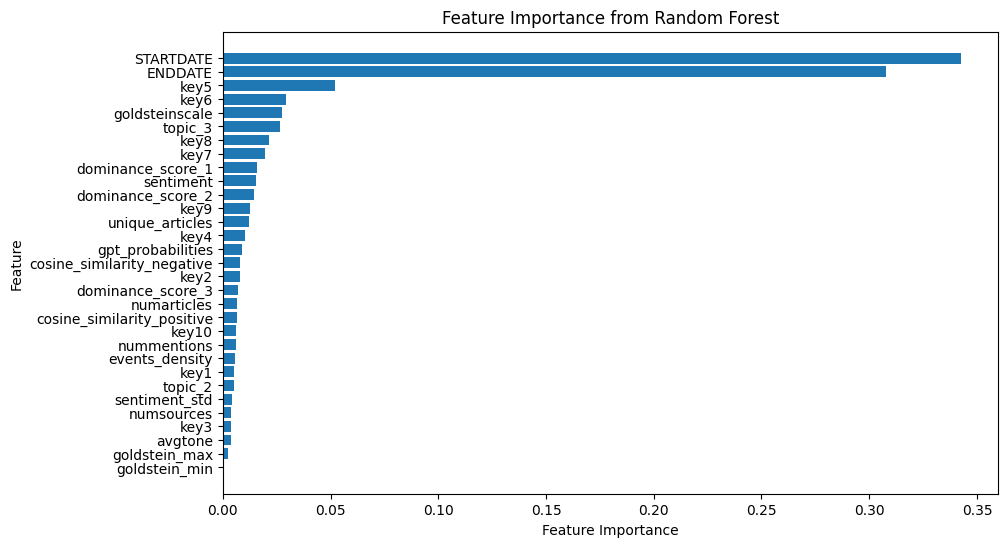

'\n######### RMSE analysis based on Y stats ########\n\n# RMSE analysis \n\nimport numpy as np\nimport pandas as pd\n\n# Example target variable statistics (replace with your actual target data)\ny = y\n\n# Given metrics\nrmse = rmse_scores.mean()  # Replace with your calculated RMSE\n\n# Compute target statistics\nmean = np.mean(y)\nstd_dev = np.std(y)\ntarget_range = np.max(y) - np.min(y)\nq1 = np.percentile(y, 25)  # 25th percentile\nq3 = np.percentile(y, 75)  # 75th percentile\niqr = q3 - q1\n\n# Comparisons\nrmse_std_ratio = rmse / std_dev\nrmse_range_ratio = rmse / target_range\nrmse_iqr_ratio = rmse / iqr\n\n# Print results and interpretations\nprint(f"RMSE: {rmse}")\nprint(f"Standard Deviation: {std_dev}")\nprint(f"RMSE / Standard Deviation: {rmse_std_ratio:.2f}")\nif rmse_std_ratio <= 1.0:\n    print("---Model performs reasonably well based on RMSE compared to the standard deviation.")\nelse:\n    print("---Model may need improvement based on RMSE compared to the standard devi

In [ ]:
# Regression WITH LLM feature

print("Regression with GPR CEL Score: ")

# Drop rows with missing target values
data = data.dropna(subset=['shifted_fatalities'])

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd

# Prepare the data
X = data.drop(columns=['Unnamed: 0', 'timeslot', 'goldstein_min_max',
                       'avg_embeddings', 'topic', 'topic_1', 'strings',
                       'summaries', 'sum(ACLED_Fatalities)', 'importance',
                       'backlogged_importance', 'shifted_fatalities'])

y = np.log10(data['shifted_fatalities'])

# Standardize the numerical features
numerical_features = ['goldsteinscale', 'avgtone', 'events_density',
                      'unique_articles', 'nummentions', 'numsources',
                      'numarticles', 'cosine_similarity_positive',
                      'cosine_similarity_negative', 'dominance_score_1', 'dominance_score_2',
                      'dominance_score_3', 'sentiment', 'sentiment_std',
                      'goldstein_min', 'goldstein_max', 'gpt_probabilities']

scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Initialize the model
model = RandomForestRegressor(random_state=42, n_estimators=100)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive MSE and calculate the mean RMSE
mse_scores = -cv_scores
rmse_scores = np.sqrt(mse_scores)
print(f"Cross-Validated MSE: {mse_scores.mean()}")
print(f"Cross-Validated RMSE: {rmse_scores.mean()}")
print("____________________________________________")

# Train the model on the entire dataset for feature importance analysis
model.fit(X, y)

# Extract feature importances
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display feature importance
print("Feature Importances:")
print(feature_importance_df)

# Optional: Plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()




"""
######### RMSE analysis based on Y stats ########

# RMSE analysis

import numpy as np
import pandas as pd

# Example target variable statistics (replace with your actual target data)
y = y

# Given metrics
rmse = rmse_scores.mean()  # Replace with your calculated RMSE

# Compute target statistics
mean = np.mean(y)
std_dev = np.std(y)
target_range = np.max(y) - np.min(y)
q1 = np.percentile(y, 25)  # 25th percentile
q3 = np.percentile(y, 75)  # 75th percentile
iqr = q3 - q1

# Comparisons
rmse_std_ratio = rmse / std_dev
rmse_range_ratio = rmse / target_range
rmse_iqr_ratio = rmse / iqr

# Print results and interpretations
print(f"RMSE: {rmse}")
print(f"Standard Deviation: {std_dev}")
print(f"RMSE / Standard Deviation: {rmse_std_ratio:.2f}")
if rmse_std_ratio <= 1.0:
    print("---Model performs reasonably well based on RMSE compared to the standard deviation.")
else:
    print("---Model may need improvement based on RMSE compared to the standard deviation.")

print(f"Target Range: {target_range}")
print(f"RMSE / Target Range: {rmse_range_ratio:.2f}")
if rmse_range_ratio <= 0.2:
    print("---Model performs reasonably well based on RMSE compared to the target range.")
else:
    print("---Model may need improvement based on RMSE compared to the target range.")

print(f"IQR: {iqr}")
print(f"RMSE / IQR: {rmse_iqr_ratio:.2f}")
if rmse_iqr_ratio <= 0.5:
    print("---Model performs reasonably well based on RMSE compared to the interquartile range.")
else:
    print("---Model may need improvement based on RMSE compared to the interquartile range.")
"""

### Testing multiple regression models (with LLM feature)

In [ ]:
# testing multiple regression models (with LLM feature)

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, ElasticNet, Lasso, BayesianRidge, HuberRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

# Define all models to test
models = {
    "RandomForestRegressor": RandomForestRegressor(random_state=42, n_estimators=100),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=42),
    "Ridge": Ridge(alpha=8.0, random_state=42),
    "ElasticNet": ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42),
    "Lasso": Lasso(alpha=0.1, random_state=42),
    "BayesianRidge": BayesianRidge(),
    "HuberRegressor": HuberRegressor(epsilon=1.35),
    "KNeighborsRegressor": KNeighborsRegressor(n_neighbors=5),
    "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "MLPRegressor": MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    "PolynomialRegression": make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
}

# Prepare the data
# Replace 'data' with your actual DataFrame
numerical_features = [
    'goldsteinscale', 'avgtone', 'events_density',
    'unique_articles', 'nummentions', 'numsources',
    'numarticles', 'cosine_similarity_positive',
    'cosine_similarity_negative', 'dominance_score_1', 'dominance_score_2',
    'dominance_score_3', 'sentiment', 'sentiment_std',
    'goldstein_min', 'goldstein_max', 'gpt_probabilities'
]

X = data.drop(columns=[
    'Unnamed: 0', 'timeslot', 'goldstein_min_max',
    'avg_embeddings', 'topic', 'topic_1', 'strings',
    'summaries', 'sum(ACLED_Fatalities)', 'importance', 'backlogged_importance',
    'shifted_fatalities'
])
y = np.log10(data['shifted_fatalities'])

# Standardize the numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Collect results
results = []

# Evaluate each model
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -cv_scores
    rmse_scores = np.sqrt(mse_scores)
    results.append({
        "Model": model_name,
        "Mean MSE": mse_scores.mean(),
        "Mean RMSE": rmse_scores.mean()
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_

                        Model  Mean MSE  Mean RMSE
0       RandomForestRegressor  0.295443   0.526005
1   GradientBoostingRegressor  0.339572   0.563561
2                       Ridge  0.877279   0.904849
3                  ElasticNet  0.462535   0.664187
4                       Lasso  0.714658   0.827448
5               BayesianRidge  0.512464   0.687606
6              HuberRegressor  0.910305   0.918631
7         KNeighborsRegressor  0.455958   0.650116
8                         SVR  0.515525   0.686648
9                MLPRegressor  3.965787   1.950537
10       PolynomialRegression  0.707317   0.820608


### ⭐ AutoML adjusted for a small dataset (via hyperparams and CV)

In [16]:
# AutoML but adjusted for a small dataset

# Install H2O
!pip install h2o

# Import H2O and other required libraries
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Start the H2O cluster
h2o.init()

# Drop rows with missing target values
data = data.dropna(subset=['shifted_fatalities'])

# Prepare the data
X = data.drop(columns=['Unnamed: 0', 'timeslot', 'goldstein_min_max',
                       'avg_embeddings', 'topic', 'topic_1', 'strings',
                       'summaries', 'sum(ACLED_Fatalities)', 'importance',
                       'backlogged_importance', 'shifted_fatalities'])

y = np.log10(data['shifted_fatalities'])

# Standardize the numerical features
numerical_features = ['goldsteinscale', 'avgtone', 'events_density',
                      'unique_articles', 'nummentions', 'numsources',
                      'numarticles', 'cosine_similarity_positive',
                      'cosine_similarity_negative', 'dominance_score_1', 'dominance_score_2',
                      'dominance_score_3', 'sentiment', 'sentiment_std',
                      'goldstein_min', 'goldstein_max', 'gpt_probabilities']

scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Combine X and y into a single DataFrame for H2O
data_h2o = pd.concat([X, pd.Series(y, name='shifted_fatalities')], axis=1)

# Convert the DataFrame to an H2O Frame
data_h2o = h2o.H2OFrame(data_h2o)

# Specify predictors (features) and response (target)
predictors = X.columns.tolist()
response = 'shifted_fatalities'

# Run H2O AutoML with cross-validation
aml = H2OAutoML(max_models=10,          # Limit the number of models
                max_runtime_secs=300,   # Total runtime of 5 minutes
                nfolds=5,               # Use 5-fold cross-validation
                seed=42)                # Ensure reproducibility

aml.train(x=predictors, y=response, training_frame=data_h2o)

# Display the leaderboard
print("\nLeaderboard:")
print(aml.leaderboard)

# Get the best model
best_model = aml.leader

# Evaluate the best model using cross-validation metrics
print("\nModel Performance (Cross-Validation Metrics):")
print(best_model.cross_validation_metrics_summary())

# Shutdown H2O (optional)
h2o.shutdown(prompt=False)


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.25" 2024-10-15; OpenJDK Runtime Environment (build 11.0.25+9-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.25+9-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpl10hby2s
  JVM stdout: /tmp/tmpl10hby2s/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpl10hby2s/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,1 month and 2 days
H2O_cluster_name:,H2O_from_python_unknownUser_ipvp7x
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |██
18:11:27.334: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 23.0.

███
18:11:36.665: GBM_2_AutoML_1_20241204_181120 [GBM def_2] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_2_AutoML_1_20241204_181120.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 18.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 18.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 18.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=10.0: must hav

<ipython-input-16-094d8c9c631b>:68: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown(prompt=False)


## **2. Testing with NO LLM feature**

### Regression with no LLM:

In [11]:
# Regression WITH NO LLM FEATURE

print("Regression with no LLM: ")

data = data.dropna(subset=['shifted_fatalities'])


from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import numpy as np



# Prepare the data
X = data.drop(columns=['Unnamed: 0', 'timeslot', 'goldstein_min_max',
                       'avg_embeddings', 'topic', 'topic_1','strings',
                       'summaries',  'sum(ACLED_Fatalities)', 'importance',
                       'backlogged_importance', 'gpt_probabilities', 'shifted_fatalities'])

y = np.log10(data['shifted_fatalities'])



# Standardize the numarical features
numarical_features = [ 'goldsteinscale', 'avgtone', 'events_density',
                      'unique_articles', 'nummentions', 'numsources',
                      'numarticles', 'cosine_similarity_positive',
                      'cosine_similarity_negative', 'dominance_score_1',  'dominance_score_2',
                      'dominance_score_3', 'sentiment', 'sentiment_std',
                      'goldstein_min', 'goldstein_max']

scaler = StandardScaler()
X[numarical_features] = scaler.fit_transform(X[numarical_features])



# Initialize the model
model = RandomForestRegressor(random_state=42, n_estimators=100)
#model = Ridge(alpha=8.0)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive MSE and calculate the mean RMSE
mse_scores = -cv_scores
rmse_scores = np.sqrt(mse_scores)
print(f"Cross-Validated MSE: {mse_scores.mean()}")
print(f"Cross-Validated RMSE: {rmse_scores.mean()}")
print("____________________________________________")

######### RMSE analysis based on Y stats ########

# RMSE analysis

import numpy as np
import pandas as pd

# Example target variable statistics (replace with your actual target data)
y = y

# Given metrics
rmse = rmse_scores.mean()  # Replace with your calculated RMSE

# Compute target statistics
mean = np.mean(y)
std_dev = np.std(y)
target_range = np.max(y) - np.min(y)
q1 = np.percentile(y, 25)  # 25th percentile
q3 = np.percentile(y, 75)  # 75th percentile
iqr = q3 - q1

# Comparisons
rmse_std_ratio = rmse / std_dev
rmse_range_ratio = rmse / target_range
rmse_iqr_ratio = rmse / iqr

# Print results and interpretations
print(f"RMSE: {rmse}")
print(f"Standard Deviation: {std_dev}")
print(f"RMSE / Standard Deviation: {rmse_std_ratio:.2f}")
if rmse_std_ratio <= 1.0:
    print("---Model performs reasonably well based on RMSE compared to the standard deviation.")
else:
    print("---Model may need improvement based on RMSE compared to the standard deviation.")

print(f"Target Range: {target_range}")
print(f"RMSE / Target Range: {rmse_range_ratio:.2f}")
if rmse_range_ratio <= 0.2:
    print("---Model performs reasonably well based on RMSE compared to the target range.")
else:
    print("---Model may need improvement based on RMSE compared to the target range.")

print(f"IQR: {iqr}")
print(f"RMSE / IQR: {rmse_iqr_ratio:.2f}")
if rmse_iqr_ratio <= 0.5:
    print("---Model performs reasonably well based on RMSE compared to the interquartile range.")
else:
    print("---Model may need improvement based on RMSE compared to the interquartile range.")


Regression with no LLM: 
Cross-Validated MSE: 0.42351433580054476
Cross-Validated RMSE: 0.5190680888201508
____________________________________________
RMSE: 0.5190680888201508
Standard Deviation: 0.5819765357236382
RMSE / Standard Deviation: 0.89
---Model performs reasonably well based on RMSE compared to the standard deviation.
Target Range: 2.0533044619542524
RMSE / Target Range: 0.25
---Model may need improvement based on RMSE compared to the target range.
IQR: 0.4246454170286289
RMSE / IQR: 1.22
---Model may need improvement based on RMSE compared to the interquartile range.


### Testing multiple regression models (no LLM feature)

In [12]:
# testing multiple regression models (no LLM feature)

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, ElasticNet, Lasso, BayesianRidge, HuberRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

# Define all models to test
models = {
    "RandomForestRegressor": RandomForestRegressor(random_state=42, n_estimators=100),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=42),
    "Ridge": Ridge(alpha=8.0, random_state=42),
    "ElasticNet": ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42),
    "Lasso": Lasso(alpha=0.1, random_state=42),
    "BayesianRidge": BayesianRidge(),
    "HuberRegressor": HuberRegressor(epsilon=1.35),
    "KNeighborsRegressor": KNeighborsRegressor(n_neighbors=5),
    "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "MLPRegressor": MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    "PolynomialRegression": make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
}

# Prepare the data
# Replace 'data' with your actual DataFrame
numerical_features = [
    'goldsteinscale', 'avgtone', 'events_density',
    'unique_articles', 'nummentions', 'numsources',
    'numarticles', 'cosine_similarity_positive',
    'cosine_similarity_negative', 'dominance_score_1', 'dominance_score_2',
    'dominance_score_3', 'sentiment', 'sentiment_std',
    'goldstein_min', 'goldstein_max'
]

X = data.drop(columns=[
    'Unnamed: 0', 'timeslot', 'goldstein_min_max',
    'avg_embeddings', 'topic', 'topic_1', 'strings',
    'summaries', 'sum(ACLED_Fatalities)', 'importance', 'backlogged_importance',
    'gpt_probabilities', 'shifted_fatalities'
])
y = np.log10(data['shifted_fatalities'])

# Standardize the numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Collect results
results = []

# Evaluate each model
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -cv_scores
    rmse_scores = np.sqrt(mse_scores)
    results.append({
        "Model": model_name,
        "Mean MSE": mse_scores.mean(),
        "Mean RMSE": rmse_scores.mean()
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_

                        Model  Mean MSE  Mean RMSE
0       RandomForestRegressor  0.423514   0.519068
1   GradientBoostingRegressor  0.416670   0.494619
2                       Ridge  1.505550   1.147597
3                  ElasticNet  0.709294   0.784931
4                       Lasso  1.231728   1.083934
5               BayesianRidge  1.681717   1.079088
6              HuberRegressor  1.808453   1.333026
7         KNeighborsRegressor  0.534563   0.628284
8                         SVR  0.559677   0.647809
9                MLPRegressor  9.944090   2.895490
10       PolynomialRegression  1.108609   0.983497


### ⭐ AutoML adjusted for a small dataset NO LLM FEATURE (via hyperparams and CV)

In [13]:
# AutoML but adjusted for a small dataset

# Install H2O
!pip install h2o

# Import H2O and other required libraries
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Start the H2O cluster
h2o.init()

# Drop rows with missing target values
data = data.dropna(subset=['shifted_fatalities'])

# Prepare the data
X = data.drop(columns=['Unnamed: 0', 'timeslot', 'goldstein_min_max',
                       'avg_embeddings', 'topic', 'topic_1', 'strings',
                       'summaries', 'sum(ACLED_Fatalities)', 'importance',
                       'backlogged_importance', 'shifted_fatalities', 'gpt_probabilities'])

y = np.log10(data['shifted_fatalities'])

# Standardize the numerical features
numerical_features = ['goldsteinscale', 'avgtone', 'events_density',
                      'unique_articles', 'nummentions', 'numsources',
                      'numarticles', 'cosine_similarity_positive',
                      'cosine_similarity_negative', 'dominance_score_1', 'dominance_score_2',
                      'dominance_score_3', 'sentiment', 'sentiment_std',
                      'goldstein_min', 'goldstein_max']

scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Combine X and y into a single DataFrame for H2O
data_h2o = pd.concat([X, pd.Series(y, name='shifted_fatalities')], axis=1)

# Convert the DataFrame to an H2O Frame
data_h2o = h2o.H2OFrame(data_h2o)

# Specify predictors (features) and response (target)
predictors = X.columns.tolist()
response = 'shifted_fatalities'

# Run H2O AutoML with cross-validation
aml = H2OAutoML(max_models=10,          # Limit the number of models
                max_runtime_secs=300,   # Total runtime of 5 minutes
                nfolds=5,               # Use 5-fold cross-validation
                seed=42)                # Ensure reproducibility

aml.train(x=predictors, y=response, training_frame=data_h2o)

# Display the leaderboard
print("\nLeaderboard:")
print(aml.leaderboard)

# Get the best model
best_model = aml.leader

# Evaluate the best model using cross-validation metrics
print("\nModel Performance (Cross-Validation Metrics):")
print(best_model.cross_validation_metrics_summary())

# Shutdown H2O (optional)
h2o.shutdown(prompt=False)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.8/265.8 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.6-py2.py3-none-any.whl size=265859786 sha256=18282241f40d552dffecd8dba97fead78746f0792c73a56468e37e438f9d55ab
  Stored in directory: /root/.cache/pip/wheels/0c/95/eb/b449c73f478dbc4557b80170cf7f2aa6db15862877e9a63536
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.25" 2024-10-15; OpenJDK Runtime Environment (build 11.0.25+9-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.25+9-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpv63_fj_e
  JVM stdout: /tmp/tmpv63_fj_e/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpv63_fj_e/h2o_unknownUser_started

H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,1 month and 2 days
H2O_cluster_name:,H2O_from_python_unknownUser_eooyea
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |██
17:56:44.171: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 23.0.

███
17:56:53.143: GBM_2_AutoML_1_20241204_175637 [GBM def_2] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_2_AutoML_1_20241204_175637.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 18.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 18.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 18.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=10.0: must hav

<ipython-input-13-5cbf442efddf>:68: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown(prompt=False)


## Exploring multicoluniarity

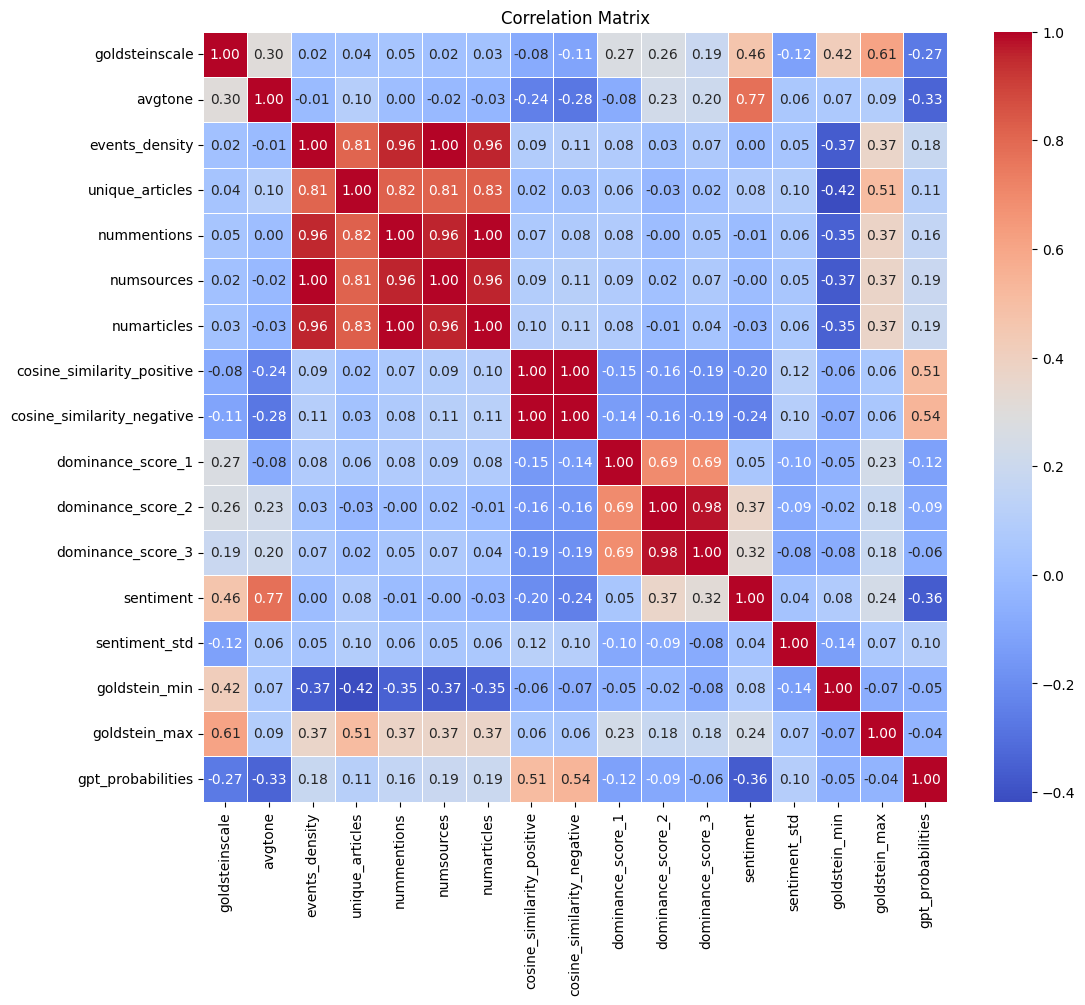

In [ ]:
# exploring multicoluniarity

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical features
numerical_features = [
    'goldsteinscale', 'avgtone', 'events_density', 'unique_articles',
    'nummentions', 'numsources', 'numarticles', 'cosine_similarity_positive',
    'cosine_similarity_negative', 'dominance_score_1', 'dominance_score_2',
    'dominance_score_3', 'sentiment', 'sentiment_std', 'goldstein_min',
    'goldstein_max', 'gpt_probabilities'
]

# Calculate the correlation matrix
correlation_matrix = X[numerical_features].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Set the correlation threshold
correlation_threshold = 0.8

# Find pairs of features with correlation above the threshold
high_corr_pairs = [
    (feature1, feature2, correlation_matrix.loc[feature1, feature2])
    for feature1 in correlation_matrix.columns
    for feature2 in correlation_matrix.columns
    if feature1 != feature2 and abs(correlation_matrix.loc[feature1, feature2]) > correlation_threshold
]

# Display the pairs
if high_corr_pairs:
    print("Highly correlated feature pairs (threshold > 0.8):")
    for pair in high_corr_pairs:
        print(f"{pair[0]} and {pair[1]}: correlation = {pair[2]:.2f}")
else:
    print("No highly correlated feature pairs found.")


Highly correlated feature pairs (threshold > 0.8):
events_density and unique_articles: correlation = 0.81
events_density and nummentions: correlation = 0.96
events_density and numsources: correlation = 1.00
events_density and numarticles: correlation = 0.96
unique_articles and events_density: correlation = 0.81
unique_articles and nummentions: correlation = 0.82
unique_articles and numsources: correlation = 0.81
unique_articles and numarticles: correlation = 0.83
nummentions and events_density: correlation = 0.96
nummentions and unique_articles: correlation = 0.82
nummentions and numsources: correlation = 0.96
nummentions and numarticles: correlation = 1.00
numsources and events_density: correlation = 1.00
numsources and unique_articles: correlation = 0.81
numsources and nummentions: correlation = 0.96
numsources and numarticles: correlation = 0.96
numarticles and events_density: correlation = 0.96
numarticles and unique_articles: correlation = 0.83
numarticles and nummentions: correla

## Interpreting Results - via ChatGPT

*These were received based on results of AutoML without LLM feature

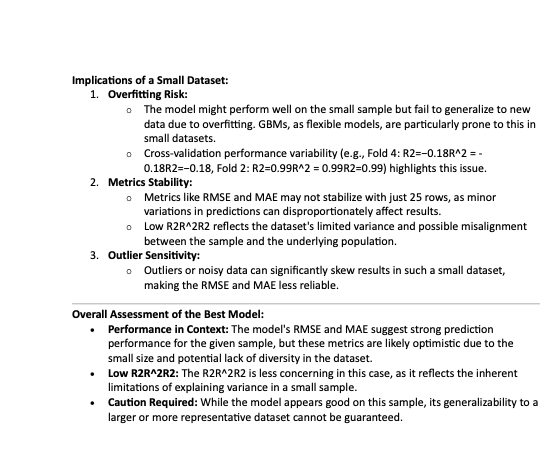